In [1]:
import re
import sys
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:

conn = sqlite3.connect('ALL_DATA_32_FEATURES.db')
tweets_df = pd.read_sql("SELECT text, lang, id_str, in_reply_to_status_id_str, [('user', 'id_str')] FROM tweets", conn)


In [29]:
print(type(tweets_df.iloc[1]['in_reply_to_status_id_str']))
tweets_df.head(5)

<class 'NoneType'>


,text,lang,id_str,in_reply_to_status_id_str,"('user', 'id_str')"
0,@johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...,en,780682646854787072,780678380534497281,224166213
1,RT @JulieThoin: L'audience reprend. Examen du ...,fr,780682647429414912,None,41935535
2,Flew into Gatwick last night. 5 hour drive nor...,en,780682655104991232,780678391846625280,220691420
3,"👎🏼 what is with Italy...#nopassport control, I...",en,780682685761093632,None,27716236
4,Qqun a déjà voyagé avec RyanAir ici ?,fr,780682727993507840,None,3315690130


In [30]:
user_df = {}

for tweet in tweets_df.values:
    if "@KLM" in tweet[0]:
        #1 = "text"
        #2 = "lang"
        #3 = "id_str"
        try:
            user_df[tweet[1]].append(tweet[2])
        except:
            user_df[tweet[1]] = [tweet[2]]

In [42]:
for key in user_df.keys():
   print(key, len(user_df[key]))

user_df

en 148410
tr 349
nl 46811
et 119
fr 4367
in 708
es 8457
de 864
ru 177
ja 2966
und 4481
pt 823
tl 278
it 711
no 4202
cs 62
th 60
ht 85
da 168
hu 22
pl 141
ro 121
ar 150
ko 70
fi 34
sv 85
is 33
lv 10
eu 49
hi 21
lt 49
cy 34
fa 18
zh 22
vi 7
uk 5
sl 7
el 10
bg 1
sr 1
si 2


{'ar': ['834443331241463809',
  '771654194868604928',
  '770624949316747264',
  '791181047702622208',
  '776185583152562180',
  '776314368510324736',
  '839231690467868672',
  '756448443057528832',
  '774913589408915456',
  '843444236955668484',
  '753548659497824256',
  '753548800048988161',
  '753549129947766784',
  '753549243135168512',
  '753549304392982528',
  '840232430846038017',
  '779757128546385920',
  '785132608225247233',
  '785133413229527040',
  '813400611802779648',
  '813425144358113280',
  '811886775631282176',
  '811887774081159168',
  '813063583802290176',
  '813077673492807680',
  '813080245821644800',
  '813082865151987712',
  '813083023512129536',
  '813086160864051201',
  '813087164141543424',
  '813089925042151424',
  '813090363984449536',
  '813090872858386434',
  '813097326797615104',
  '813100661743255552',
  '813101383016648706',
  '813105920557387780',
  '813116544351956993',
  '813124774595588097',
  '813125543268847617',
  '813132456958300160',
  '8131390

In [46]:
klm_df = {}
count = 0

for tweet in tweets_df.values:
    if "56377143" == tweet[4]:
        #4 = "in_reply_to_status_id"
        #2 = "lang"
        #7 = ('user', 'id_str')
        if isinstance(tweet[3], str):
            if not (tweet[3] in klm_df.keys()):
                klm_df[tweet[3]] = tweet[1]

In [53]:
len(klm_df)
klm_df

{'780682147665440768': 'nl',
 '780663421293371392': 'en',
 '780677919014354944': 'en',
 '780680263751897088': 'en',
 '780695993214001152': 'nl',
 '780697855384231936': 'nl',
 '780697635346866176': 'nl',
 '780702303397482496': 'nl',
 '780680078145495040': 'en',
 '780704142759079936': 'nl',
 '780706543163609092': 'nl',
 '780691978115833856': 'en',
 '780696778660347904': 'en',
 '780701596812541956': 'en',
 '780697655513083904': 'en',
 '780709575049809921': 'fr',
 '780707072149221376': 'en',
 '780715632958509057': 'en',
 '780714692692115457': 'en',
 '780703121655816192': 'en',
 '780701836177182720': 'en',
 '780711282953621504': 'nl',
 '780715554571218944': 'en',
 '780711272283250688': 'nl',
 '780720259900829696': 'en',
 '780720310916030464': 'en',
 '780608876529881088': 'en',
 '780717478494212097': 'nl',
 '780720338015514624': 'en',
 '780717196771196928': 'nl',
 '780725471994523652': 'en',
 '780710031150944256': 'en',
 '780720264405454848': 'nl',
 '780721375040401408': 'nl',
 '780721844370

In [57]:
language_dict = {}
outgoing_counter = 0
same_language = 0

total = 0
error = 0
for lang, id_list in user_df.items():
    outgoing_counter = 0
    same_language = 0
    incoming = len(id_list)
    for tweet_id in id_list:
        if str(tweet_id) in klm_df.keys():
            outgoing_counter += 1
            if klm_df[str(tweet_id)] == lang:
                same_language += 1
    language_dict[lang] = [incoming, outgoing_counter, same_language]

In [58]:
language_df = pd.DataFrame(language_dict)
language_df = language_df[['en', 'nl', 'es', 'fr', 'de']]
language_df = language_df.rename({0: 'incoming', 1: 'outgoing', 2: 'same language'})

In [59]:
language_df.loc['% outgoing'] = (language_df.loc['outgoing'] / language_df.loc['incoming'])*100
language_df.loc['% outgoing same language'] = (language_df.loc['same language'] / language_df.loc['outgoing'])*100
language_df.loc['% outgoing of same language'] = ((language_df.loc['outgoing'] / language_df.loc['incoming']) * (language_df.loc['same language'] / language_df.loc['outgoing']))*100
language_df = language_df.T

In [60]:
language_df = language_df.reset_index()
language_df['index'][language_df['index'] == 'en']='English'
language_df['index'][language_df['index'] == 'nl']='Dutch'
language_df['index'][language_df['index'] == 'es']='Spanish'
language_df['index'][language_df['index'] == 'fr']='French'
language_df['index'][language_df['index'] == 'de']='German'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

In [61]:
language_df

,index,incoming,outgoing,same language,% outgoing,% outgoing same language,% outgoing of same language
0,English,148410.0,28520.0,27913.0,19.217034,97.871669,18.808032
1,Dutch,46811.0,17153.0,16922.0,36.643097,98.653297,36.149623
2,Spanish,8457.0,1110.0,1051.0,13.125222,94.684685,12.427575
3,French,4367.0,349.0,295.0,7.991756,84.527221,6.755210
4,German,864.0,338.0,275.0,39.120370,81.360947,31.828704


In [62]:
import seaborn as sns

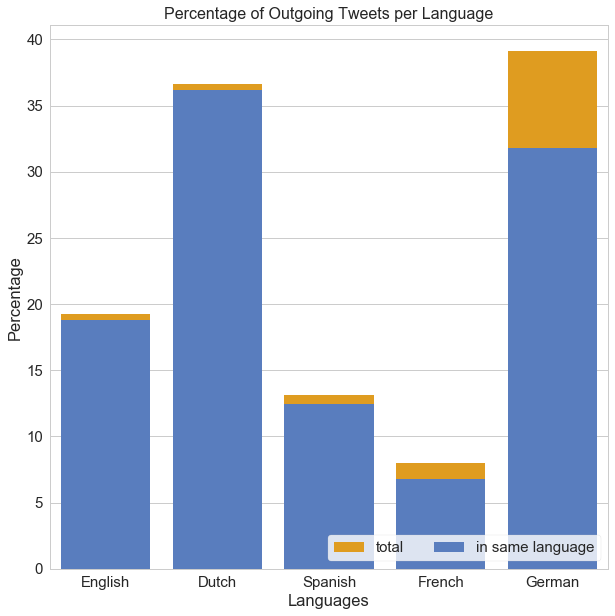

In [63]:
sns.set(style="whitegrid", font_scale=1.5)

fig, ax = plt.subplots(figsize=(10,10))
sns.set_color_codes("pastel")
sns.barplot(x='index', y='% outgoing', data=language_df, label="total", color="orange")
sns.set_color_codes("muted")
sns.barplot(x='index', y="% outgoing of same language", data=language_df, label="in same language", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel='Languages', ylabel="Percentage");
ax.set_title("Percentage of Outgoing Tweets per Language", fontsize=16);
plt.savefig('outgoingtweets', dpi=300)
plt.show()

In [73]:
language_df2 = pd.DataFrame(language_dict)
language_df2 = language_df2[['en', 'nl', 'es', 'fr', 'de']]
language_df2 = language_df2.rename({0: 'incoming', 1: 'outgoing', 2: 'same language'})
language_df2 = language_df2.transpose()


In [74]:
language_df2

,incoming,outgoing,same language
en,148410,28520,27913
nl,46811,17153,16922
es,8457,1110,1051
fr,4367,349,295
de,864,338,275


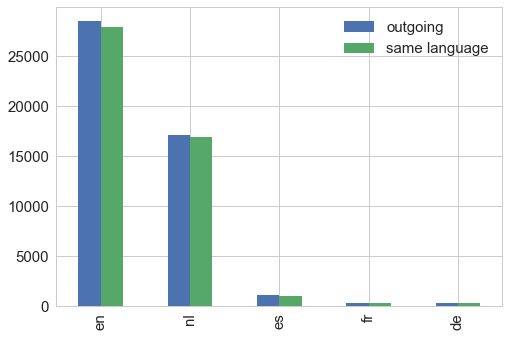

In [82]:
language_df2[['outgoing', 'same language']].plot(kind='bar')
plt.show()

In [84]:
fig, ax = plt.subplots(nrows=2, ncols=2)

In [85]:
conv_df = pd.read_sql("SELECT * FROM conversations", conn)

In [97]:
conv_df.head()

,False,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved,mean_sentiment,sentiments,full_text
0,0,5,"[(747530773037780992, 31132554), (747526794446...",2,"[747526794446802944, 747530773037780992]","[22873368, 31132554]",['No airlines involved'],NaN,"[nan, 1]",['Hey @British_Airways our @easyJet flight Ven...
1,1,6,"[(747530681509625860, 417945325), (74745123859...",2,"[747451238598475776, 747530681509625860]","[55904765, 417945325]",['No airlines involved'],0.0,"[0, 0]",['@easyJet thanks for looking after my luggage...
2,2,11,"[(747530531475173376, 597673831), (74752831114...",2,"[747528311144734720, 747530531475173376]","[427951650, 597673831]",['No airlines involved'],0.5,"[1, 0]","[""@British_Airways I booked via Expedia. I'm n..."
3,3,12,"[(747530509098450944, 1624311463), (7475297117...",2,"[747529711782244352, 747530509098450944]","[1624311463, 1624311463]",['No airlines involved'],0.0,"[0, 0]",['@easyJet is there anyway to travel with 2 ca...
4,4,14,"[(747530348561571840, 154605692), (74752081839...",2,"[747520818398232576, 747530348561571840]","[117754884, 154605692]",['No airlines involved'],0.5,"[1, 0]",['@easyJet how nice of you not to reply to my ...


In [87]:
klm_conv_df = conv_df[conv_df['airlines_involved']=="['KLM']"]

In [150]:
print(klm_conv_df.shape)
print(klm_conv_df["conversation_length"].mean())
print(klm_conv_df["conversation_length"].std())

(37868, 10)
2.396614555825499
0.800088561430056


In [127]:
incoming_sent_klm = []
error = 0
total = 0
for value in klm_conv_df.values:
    ids = eval(value[5])
    i=0
    for tweetid in ids:
        if int(tweetid) != 56377143:
            try:
                sents = eval(value[8])
                incoming_sent_klm.append(sents[i])
            except NameError:
                error += 1
            total += 1
        i += 1
    

In [128]:
mean = sum(incoming_sent_klm)/len(incoming_sent_klm)
print("mean: " + str(mean))
sum2 = 0
for item in incoming_sent_klm:
    sum2 += (item - mean)**2 

sd = sum2 / (len(incoming_sent_klm)-1)
print("sd: " + str(sd))


mean: 0.6105334924152037
sd: 0.6226733762589864


In [129]:
ba_conv_df = conv_df[conv_df['airlines_involved']=="['British_Airways']"]

In [130]:
incoming_sent_ba = []
error = 0
total = 0
for value in ba_conv_df.values:
    ids = eval(value[5])
    i=0
    for tweetid in ids:
        if int(tweetid) != 18332190:
            try:
                sents = eval(value[8])
                incoming_sent_ba.append(sents[i])
            except NameError:
                error += 1
            total += 1
        i += 1

In [131]:
mean = sum(incoming_sent_ba)/len(incoming_sent_ba)
print("mean: " + str(mean))
sum2 = 0
for item in incoming_sent_ba:
    sum2 += (item - mean)**2 

sd = sum2 / (len(incoming_sent_ba)-1)
print("sd: " + str(sd))


mean: 0.44849175426989146
sd: 0.47379785259137563


In [149]:
print(ba_conv_df.shape)
print(ba_conv_df["conversation_length"].mean())
print(ba_conv_df["conversation_length"].std())

(68941, 10)
2.3702441217852948
0.740362298418123


In [139]:
df = pd.read_csv('conversations_with_sentimpact.csv', encoding='ISO-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
df = df[df.astype(str)['SentChange'] != '[]']

In [141]:
klm_conv_sent_df = df[df['airlines_involved']=="['KLM']"]

In [142]:
klm_conv_sent_df

,Unnamed: 0,Unnamed: 0.1,False,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved,mean_sentiment,sentiments,full_text,dates,SentChange
345,345,345,345,1622,"[(747434096524148736, 713489638330122240), (74...",3,"[747415842791489536, 747433835948810240, 74743...","[713489638330122240, 56377143, 713489638330122...",['KLM'],1.000000,"[1, 0, 2]","['Got live person, asks ridiculous question an...","['Mon Jun 27 13:06:37 +0000 2016', 'Mon Jun 27...",[-1.0]
417,417,417,417,2045,"[(747408302234009600, 1862534881), (7474007137...",3,"[747391263066963968, 747400713777586176, 74740...","[1862534881, 56377143, 1862534881]",['KLM'],0.666667,"[0, 2, 0]","['@British_Airways can he travel with it , in ...","['Mon Jun 27 11:28:57 +0000 2016', 'Mon Jun 27...",[0.0]
557,557,557,557,2520,"[(754042826342686720, 56377143), (754015545607...",6,"[753644589073006592, 753683090954825728, 75377...","[18432332, 56377143, 18432332, 56377143, 18432...",['KLM'],0.666667,"[0, 0, 2, 2, 0, 0]","['@British_Airways all your lines are engaged,...","['Thu Jul 14 17:37:26 +0000 2016', 'Thu Jul 14...",[-2.0]
614,614,614,614,2623,"[(754038882740670464, 2794532613), (7540386880...",3,"[754030822764654592, 754038688011681792, 75403...","[2794532613, 56377143, 2794532613]",['KLM'],0.333333,"[0, 0, 1]","['@AmericanAir a disastrous flight,the guarant...","['Fri Jul 15 19:12:12 +0000 2016', 'Fri Jul 15...",[-1.0]
759,759,759,759,2907,"[(754025715746693120, 140345199), (75402206557...",3,"[753998269701906432, 754022065578057728, 75402...","[140345199, 56377143, 140345199]",['KLM'],0.000000,"[0, 0, 0]","[""@British_Airways Trying to get in touch with...","['Fri Jul 15 17:02:50 +0000 2016', 'Fri Jul 15...",[0.0]
824,824,824,824,3027,"[(754020614961266689, 301862562), (75390840923...",9,"[753749929592492032, 753752941949964288, 75378...","[301862562, 56377143, 301862562, 56377143, 301...",['KLM'],0.333333,"[1, 1, 0, 1, 0, 0, 0, 0, 0]",['Happy 100th birthday @BoeingAirplanes from y...,"['Fri Jul 15 00:36:01 +0000 2016', 'Fri Jul 15...","[1.0, 0.0]"
1040,1040,1040,1040,3488,"[(753999979757338625, 17922403), (753994918612...",3,"[753979931877576704, 753994918612250624, 75399...","[17922403, 56377143, 17922403]",['KLM'],0.666667,"[0, 2, 0]",['Srs.@airfrance tengo vuelo con ustedes n° tr...,"['Fri Jul 15 15:49:58 +0000 2016', 'Fri Jul 15...",[0.0]
1272,1272,1272,1272,3923,"[(753978373777428481, 100444506), (75388531113...",3,"[753685494580387840, 753885311130857472, 75397...","[100444506, 56377143, 100444506]",['KLM'],0.000000,"[0, 0, 0]","[""@A_PWRFUL_FRIEND What's the flight number?"",...","['Thu Jul 14 20:19:59 +0000 2016', 'Fri Jul 15...",[0.0]
1429,1429,1429,1429,4248,"[(753961278280982528, 56377143), (753944548687...",4,"[753934386068881408, 753942906487144448, 75394...","[453095144, 56377143, 453095144, 56377143]",['KLM'],0.000000,"[0, 0, 0, 0]","[""And, of course, @AmericanAir only answered m...","['Fri Jul 15 12:48:59 +0000 2016', 'Fri Jul 15...",[0.0]
1499,1499,1499,1499,4391,"[(753954188724494336, 56377143), (753942826954...",4,"[753925545331744768, 753941109923979264, 75394...","[254573320, 56377143, 254573320, 56377143]",['KLM'],0.750000,"[1, 1, 0, 1]",['@British_Airways on this BA plane heading b...,"['Fri Jul 15 12:13:51 +0000 2016', 'Fri Jul 15...",[1.0]


In [143]:
sentchanges_klm = []
error = 0
total = 0
for value in klm_conv_sent_df.values:
    sent_changes = eval(value[13])
    i=0
    for tiem in sent_changes:
        sentchanges_klm.append(tiem)
    

In [145]:
print("KLM Sentiment Change")
mean = sum(sentchanges_klm)/len(sentchanges_klm)
print("mean: " + str(mean))
sum2 = 0
for item in sentchanges_klm:
    sum2 += (item - mean)**2 

sd = sum2 / (len(sentchanges_klm)-1)
print("sd: " + str(sd))


KLM Sentiment Change
mean: -0.26000842815002106
sd: 0.9026453624921844


In [148]:
ba_conv_sent_df = df[df['airlines_involved']=="['British_Airways']"]

sentchanges_ba = []
error = 0
total = 0
for value in ba_conv_sent_df.values:
    sent_changes = eval(value[13])
    i=0
    for tiem in sent_changes:
        sentchanges_ba.append(tiem)
    

print("BA Sentiment Change")
mean = sum(sentchanges_ba)/len(sentchanges_ba)
print("mean: " + str(mean))
sum2 = 0
for item in sentchanges_ba:
    sum2 += (item - mean)**2 

sd = sum2 / (len(sentchanges_ba)-1)
print("sd: " + str(sd))


BA Sentiment Change
mean: -0.23779573090140108
sd: 0.6743297154711381
